# 식물 특징 검출기

### 동작원리

1. PlantNet300K 데이터셋의 1081종의 식물을 사전학습한 분류모델 로드
1. 불러온 모델에 사용자 입력 식물사진(사진의 절대경로)을 넣어 학습한 데이터셋과 비교
1. 모델의 출력(plantNet300K에서 학습한 식물군 중, 가장 유사하다고 모델이 판정한 종)으로 나온 식물종 추출
1. 모델의 출력으로부터 가져온 식물종을 CAM api(pytorch-grad-cam 라이브러리에 정의)에 넣어 CAM 히트맵 추출
1. 히트맵을 기반으로한 바운딩 박스 삽입

### 학습모델
- EfficientNet-B4

### 사전학습한 데이터셋
- PlantNet300k(https://zenodo.org/record/4726653#.Y19UJtJBzS8)

### 주요 사용 라이브러리
- pytorch-grad-CAM(https://github.com/jacobgil/pytorch-grad-cam)
- albumentation(https://github.com/albumentations-team/albumentations
- timm(https://github.com/rwightman/pytorch-image-models)

## 사용방법
1. main모듈의 get_CAM 함수 import
1. 이용하고자 하는 식물사진이 저장되어 있는 장소의 절대경로를 get_CAM 함수에 입력

### get_CAM(path,use_gpu=False,shape=(224,224),type=1, method='eigenCAM', save_name='sample_data')
input
- (str)path: 분석하고자 하는 식물 사진의 절대경로

- (boolean)use_gpu: CUDA gpu 사용 여부(False: cpu, True: cuda )

- (tuple)shape: resizing 할 입력사진의 크기(default : (224,224))

- (int)type: 얻고자 하는 테이블의 타입
        1: CAM 종류별 적용 결과 시각화 테이블
        2: CAM 종류를 사용자가 선택하여 해당 CAM에 대한 적용 결과 시각화 및 결과 히트맵 기반 바운딩 박스 추출

- (str)method: CAM 종류선택
               ('gradCAM', 'gradCAM++', 'layerCAM', 'eigenCAM', 'ScoreCAM' 5가지 종류의 CAM 제공)

- (str)save_name: 출력결과 테이블 이미지 파일 저장 이름

output
- (tuple)(tuple(point), tuple(new_points)) : resizing된 사진에서의 bounding box좌표(point(x,y))와 원본 사진에서의 bounding box 좌표(new_points(x,y)) 

## 튜토리얼

### 1. import ( get_CAM method 및 사진 경로를 불러오는데 필요한 os 모듈)

In [1]:
from main import get_CAM
import os

### 2. 사진 경로 불러오기(샘플 데이터는 배롱나무꽃, 무궁화, 백합을 이용하였습니다)

In [2]:
samples=[]
sample_list=os.listdir("./sample_input")
for i in range(len(sample_list)):
    samples.append(os.path.join(os.getcwd(),"sample_input",sample_list[i]))
print(samples)

['/home/files/CAM_software/sample_input/백합꽃002-Copy1.jpg', '/home/files/CAM_software/sample_input/배롱나무꽃004-Copy1.jpg', '/home/files/CAM_software/sample_input/무궁화꽃0474-Copy1.jpg', '/home/files/CAM_software/sample_input/무궁화꽃0529-Copy1.jpg', '/home/files/CAM_software/sample_input/백합꽃005-Copy1.jpg', '/home/files/CAM_software/sample_input/배롱나무꽃005-Copy1.jpg', '/home/files/CAM_software/sample_input/무궁화꽃0482-Copy1.jpg', '/home/files/CAM_software/sample_input/백합꽃001-Copy1.jpg', '/home/files/CAM_software/sample_input/백합꽃004-Copy1.jpg', '/home/files/CAM_software/sample_input/배롱나무꽃003-Copy1.jpg', '/home/files/CAM_software/sample_input/배롱나무꽃002-Copy1.jpg', '/home/files/CAM_software/sample_input/배롱나무꽃001-Copy1.jpg', '/home/files/CAM_software/sample_input/무궁화꽃0467-Copy1.jpg', '/home/files/CAM_software/sample_input/백합꽃003-Copy1.jpg', '/home/files/CAM_software/sample_input/무궁화꽃0456-Copy1.jpg']


### type 1

Using cuda device


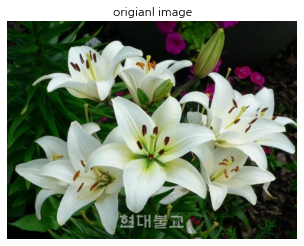

100%|█████████████████████████████████████████████████████████████████████████████████| 112/112 [00:02<00:00, 39.22it/s]


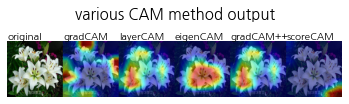

Using cuda device


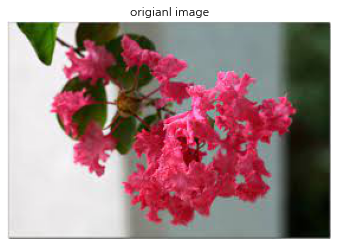

100%|█████████████████████████████████████████████████████████████████████████████████| 112/112 [00:02<00:00, 39.54it/s]


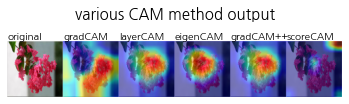

Using cuda device


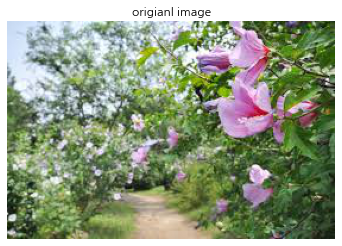

100%|█████████████████████████████████████████████████████████████████████████████████| 112/112 [00:02<00:00, 38.03it/s]


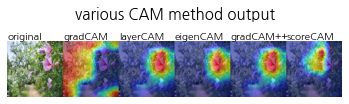

In [5]:
for i in range(4,len(samples),5):
    get_CAM(samples[i], True, save_name= "sample_type1_{}".format(i))

### type2

Using cuda device


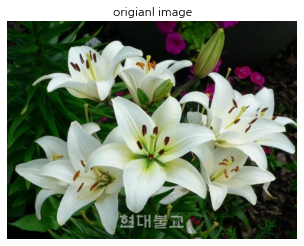

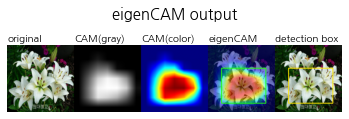

(((45, 77), (193, 194)), ((120.53571428571428, 154.68750000000003), (516.9642857142857, 389.7321428571429)))

Using cuda device


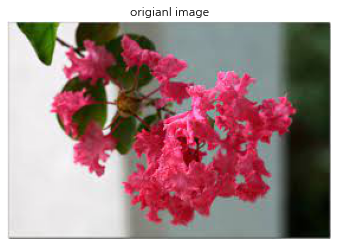

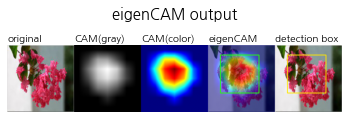

(((41, 33), (170, 160)), ((50.151785714285715, 27.107142857142858), (207.94642857142858, 131.42857142857142)))

Using cuda device


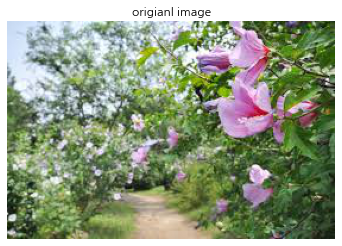

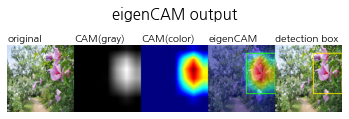

(((128, 27), (224, 162)), ((157.71428571428572, 22.058035714285715), (276.0, 132.34821428571428)))



In [6]:
for i in range(4,len(samples),5):
    print(get_CAM(samples[i], True, type=2, method='eigenCAM',save_name= "sample_type2_{}".format(i)))
    print("")